# Testing and regularization

In [1]:
!git clone https://github.com/s7s/machine_learning_1.git
%cd  machine_learning_1/polynomial_regression

Cloning into 'machine_learning_1'...
remote: Enumerating objects: 81, done.
remote: Counting objects: 100% (81/81), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 81 (delta 27), reused 74 (delta 20), pack-reused 0
Unpacking objects: 100% (81/81), done.
/content/machine_learning_1/polynomial_regression


In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
random.seed(0)

## Defining our dataset

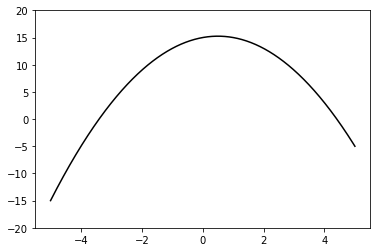

In [3]:
# Our original polynomial is -x^2+x+15
coefs = [15,1,-1]

def polynomial(coefs, x):
    n = len(coefs)
    return sum([coefs[i]*x**i for i in range(n)])

def draw_polynomial(coefs):
    n = len(coefs)
    x = np.linspace(-5, 5, 1000)
    plt.ylim(-20,20)
    plt.plot(x, sum([coefs[i]*x**i for i in range(n)]), linestyle='-', color='black')

draw_polynomial(coefs)

In [4]:
X = []
Y = []
for i in range(40):
    x = random.uniform(-5,5)
    y = polynomial(coefs, x) + random.gauss(0,2)
    X.append(x)
    Y.append(y)
X=np.array(X)
Y=np.array(Y)

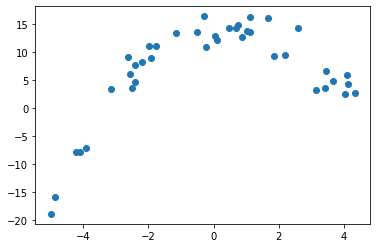

In [5]:
plt.scatter(X, Y)
#draw_polynomial(coefs)

## Training a polynomial regression model

In [6]:
for datasample in zip(X,Y):
    print(datasample)

(3.4442185152504816, 6.685961311021467)
(-2.4108324970703663, 4.690236225597948)
(0.11274721368608542, 12.205789026637378)
(-1.9668727392107255, 11.133217991032268)
(-0.23403045847644144, 10.927272159051856)
(0.046868558173902564, 12.8584762866286)
(-2.1816215560029617, 8.16012255928749)
(-2.4949365863755943, 3.5061587527226514)
(4.097462559682402, 5.933186396721837)
(4.021659504395828, 2.454299054753137)
(-1.8985243068066735, 8.956020414039855)
(1.8398393191544127, 9.208004401915796)
(-0.2785728454728664, 16.36505651355184)
(1.1088697344380165, 16.14144978027318)
(4.130110532378982, 4.299534274468492)
(3.6530992777164, 4.83366913200435)
(-2.395076896080406, 7.723543125251446)
(-4.8595829983598104, -15.848718674227753)
(2.1970468640395415, 9.366124268570305)
(1.6815320123185087, 16.070558182542374)
(-4.988571806855717, -18.893035332565795)
(-2.5608912311286804, 6.043189895391749)
(-1.7479563725260991, 11.091071520573042)
(0.6751074062067186, 14.272553413210698)
(-2.6138407138477984, 9.

### Adding columns to our dataset corresponding to $x^2, x^3, \ldots, x^{200}$

In [7]:
from sklearn.preprocessing import PolynomialFeatures
def addPoly(X,polyDegree):
    poly = PolynomialFeatures(200,include_bias=False)
    X=poly.fit_transform(X.reshape(-1, 1))
    return X
X_poly=addPoly(X,200)

In [8]:
print(X_poly.shape)
print(X_poly[0,:])

(40, 200)
[3.44421852e+000 1.18626412e+001 4.08575284e+001 1.40722256e+002
 4.84678199e+002 1.66933763e+003 5.74956356e+003 1.98027533e+004
 6.82050095e+004 2.34912956e+005 8.09091554e+005 2.78668811e+006
 9.59796279e+006 3.30574811e+007 1.13857189e+008 3.92149037e+008
 1.35064697e+009 4.65192332e+009 1.60222404e+010 5.51840971e+010
 1.90066089e+011 6.54629143e+011 2.25468581e+012 7.76563063e+012
 2.67465288e+013 9.21208897e+013 3.17284474e+014 1.09279706e+015
 3.76383187e+015 1.29634594e+016 4.46489869e+016 1.53780867e+017
 5.29654911e+017 1.82424725e+018 6.28310616e+018 2.16403906e+019
 7.45342338e+019 2.56712188e+020 8.84172871e+020 3.04528457e+021
 1.04886255e+022 3.61251182e+022 1.24422801e+023 4.28539315e+023
 1.47598304e+024 5.08360812e+024 1.75090572e+025 6.03050191e+025
 2.07703663e+026 7.15376803e+026 2.46391403e+027 8.48625832e+027
 2.92285280e+028 1.00669437e+029 3.46727540e+029 1.19420541e+030
 4.11310440e+030 1.41664303e+031 4.87922816e+031 1.68051280e+032
 5.78805329e+03

## Splitting data into training and testing

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_poly, Y, test_size=0.2)

In [13]:
from sklearn.metrics import mean_squared_error
def display_results(model):
    coefs = [model.intercept_]
    coefs += list(model.coef_)
    ytrain_predict=model.predict(X_train)
    ytest_predict=model.predict(X_test)
    train_error=np.sqrt(mean_squared_error(y_train,ytrain_predict))
    test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
    print("Training error (rmse):", train_error)
    print("Testing error (rmse):", test_error)
    plt.scatter(X_train[:,0], y_train, marker='o')
    plt.scatter(X_test[:,0], y_test, marker='^')
    draw_polynomial(coefs)
    plt.show()
    print("Polynomial coefficients")
    print(coefs)

## Training a polynomial regression model with no regularization

In [14]:
from sklearn.linear_model import LinearRegression
model_no_reg = LinearRegression(normalize=True)
model_no_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

Training error (rmse): 0.4842514242871714
Testing error (rmse): 724766.480223356


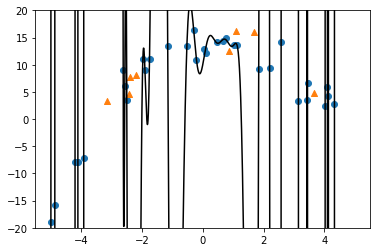

Polynomial coefficients
[9.976784007698827, 28.859925703118872, 73.61854863748181, -531.7895027812459, 35.910076090084665, 2384.8664638544533, -1663.4234319445798, -3641.349910547599, 3312.485979982213, 2707.1375575627235, -2774.0006443650764, -1147.0154138221174, 1246.2661827753866, 293.3653794022134, -326.3800938379344, -45.0018195665372, 50.443703198571335, 3.834593896999721, -4.319389762873042, -0.14190411174887718, 0.15426647722837503, 0.00014862951318927154, 0.0021574428555877, -7.4739094140177345e-06, -0.00017778062348175418, 1.530893685329407e-06, -5.7253471965933065e-06, 2.820555344917371e-07, 4.739248980801527e-08, 1.1059225471673353e-08, 8.458818998908072e-09, -3.409578060184249e-11, 3.0828690612633306e-10, -2.466224288180589e-11, 4.6964258670959666e-12, -1.491777094349464e-12, -1.1460949858725008e-13, -5.243895070046766e-14, -1.1556709215606435e-14, -9.4658953357804e-16, -5.011775941246945e-16, 2.0424337156938915e-17, -1.5752297034366487e-17, 2.8737994037423545e-18, -3.5501

In [15]:
display_results(model_no_reg)

## Training a polynomial regression model with L1 regularization

In [16]:
from sklearn import linear_model
model_L1_reg = linear_model.Lasso(alpha=0.1,normalize=True)
model_L1_reg.fit(X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

Training error (rmse): 2.0352128128345823
Testing error (rmse): 2.393922555836719


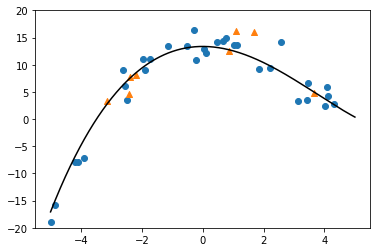

Polynomial coefficients
[13.360219346671578, 0.0, -0.8683762467823999, 0.061320663629833384, -0.0, 0.0003370384265022938, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0

In [17]:
display_results(model_L1_reg)

## Training a polynomial regression model with L2 regularization

In [18]:
from sklearn import linear_model
model_L2_reg = linear_model.Ridge(alpha=0.1,normalize=True)
model_L2_reg.fit(X_train, y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)

Training error (rmse): 2.0621602491419813
Testing error (rmse): 2.364678297203994


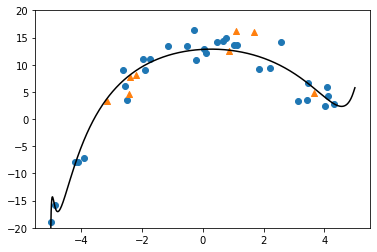

Polynomial coefficients
[12.823602532486559, 0.3012334856862072, -0.5491748030560163, 0.01996904659363896, -0.012960889626109934, 0.0009868570553600215, -0.0002693210338596677, 3.848080133855069e-05, -4.494466842606949e-06, 1.2593499795228786e-06, -3.685295782400986e-08, 3.578992432398423e-08, 1.5098342892858326e-09, 8.84805350672919e-10, 1.1780641257375812e-10, 1.776456337468747e-11, 5.6890401459509746e-12, 1.8762453323653513e-13, 2.3957228965751697e-13, -7.211804668497179e-15, 9.527763096029973e-15, -6.860118932581849e-16, 3.6884812330443303e-16, -3.7742962237428567e-17, 1.4093082704998218e-17, -1.7623752235464575e-18, 5.350885070673134e-19, -7.613769308333977e-20, 2.0257647053551676e-20, -3.1476734338253304e-21, 7.659642135920252e-22, -1.2660491016235345e-22, 2.894562567235864e-23, -4.9999997964260984e-24, 1.0934285582893618e-24, -1.9495610544960935e-25, 4.128530334592383e-26, -7.531015503548291e-27, 1.5577915312577242e-27, -2.8886486382657214e-28, 5.872492468734006e-29, -1.10180290

In [19]:
display_results(model_L2_reg)

## Viewing the predictions in the testing set

In [20]:
import pandas as pd
from IPython.display import display
predictions={}
predictions ['x']=X_test[:,0]
predictions ['y']=y_test
predictions['No reg'] = model_no_reg.predict(X_test)
predictions['L1 reg'] = model_L1_reg.predict(X_test)
predictions['L2 reg'] = model_L2_reg.predict(X_test)
predictions=pd.DataFrame.from_dict(predictions)
display(predictions)

,x,y,No reg,L1 reg,L2 reg
0,-2.181622,8.160123,-2.706703e+02,8.573835,8.960846
1,-2.395077,7.723543,-2.702503e+02,7.509818,8.096088
2,-2.410832,4.690236,-2.234013e+02,7.426443,8.027009
3,0.876171,12.574041,1.371320e+01,12.735008,12.672142
4,3.653099,4.833669,-2.357604e+05,4.980345,5.691748
5,-3.132705,3.308124,2.036350e+06,2.851191,3.870351
6,1.681532,16.070558,-1.716773e+02,11.200929,11.777135
7,1.108870,16.141450,1.384690e+01,12.376644,12.491228
